In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the train and test datasets.

train = pd.read_csv('Train_UWu5bXk.txt')
test = pd.read_csv('Test_u94Q5KV.txt')

In [3]:
#Printing the head of the data

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Getting the shape of the data

train.shape

(8523, 12)

In [5]:
#Getting the information of the data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
#Gettting the information of the test data

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### Observation:

We have null values in the following columns -

1. Item_Weight

2. Outlet_Size

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


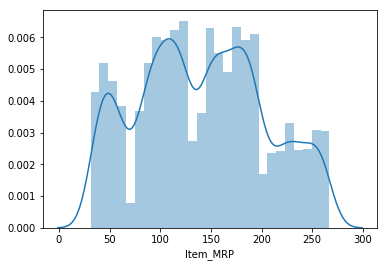

In [8]:
#Checking the distribution of the item_mrp

sns.distplot(train['Item_MRP'])

### Observation:

1. Item_MRP shows 4 different distributions hence it need log transformation.

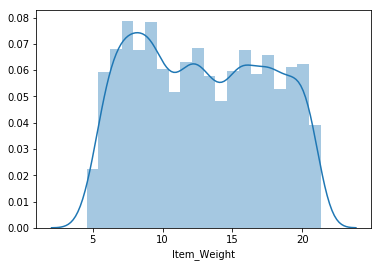

In [9]:
#Plotting the distribution of the Item_weight without considering the null values

sns.distplot(train[pd.notnull(train['Item_Weight'])]['Item_Weight'])

In [10]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


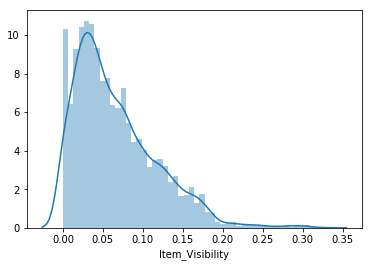

In [11]:
#Plotting the distribution of item visibility

sns.distplot(train['Item_Visibility'])

### Observations:

The item_visibility has a peaked and skewed distribution, with certain products with veru high visibility and few products with no visibility.

In [12]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


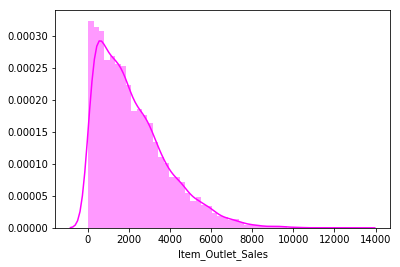

In [13]:
#Plotting the distribution plot for the Outlet Sales (i.e Also our target variable)

sns.distplot(train['Item_Outlet_Sales'],color='magenta')
plt.show()

### Observations :

The Item_outlet_sales is highly peaked and skewed. With majority sales lies in range of 0-2000.

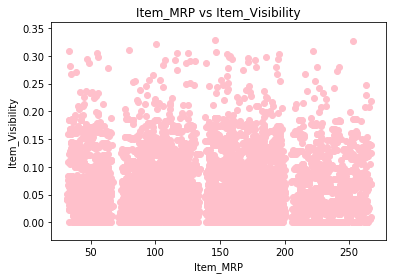

In [14]:
#Plotting a scatter plot between Item_MRP and Item_Visibility

plt.scatter(train['Item_MRP'],train['Item_Visibility'], color = 'pink')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Visibility')
plt.title('Item_MRP vs Item_Visibility')
plt.show()

### Observations:

The relation between item MRP and Item visiility is binned.

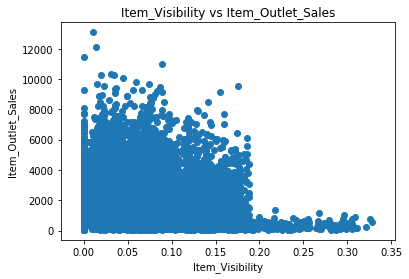

In [15]:
#Scatter plot between visibility of products and sales

plt.scatter(train['Item_Visibility'],train['Item_Outlet_Sales'])
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility vs Item_Outlet_Sales')
plt.show()

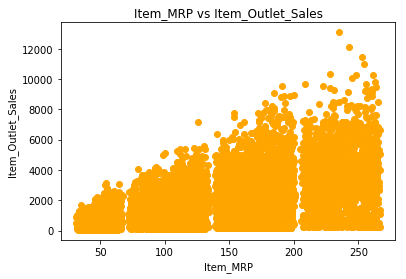

In [16]:
plt.scatter(train['Item_MRP'],train['Item_Outlet_Sales'],color = 'orange')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_MRP vs Item_Outlet_Sales')
plt.show()

### Observations:

The items with low visibility have high sales whereas the items with high visibility has low sales.

The items which have high MRP have also have high sales values. The data is binned.

In [17]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


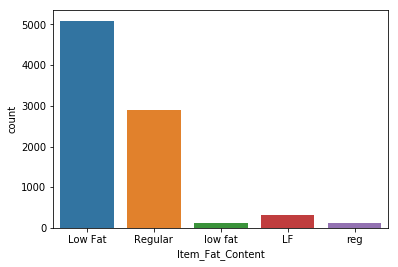

In [18]:
#Categorical Varaibles

sns.countplot(train['Item_Fat_Content'])

#low fat, LF fall under Low Fat and reg falls under Regular

In [19]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(to_replace = ['LF','low fat','reg'], value = ['Low Fat', 'Low Fat', 'Regular'])

In [20]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace(to_replace = ['LF','low fat','reg'], value = ['Low Fat', 'Low Fat', 'Regular'])

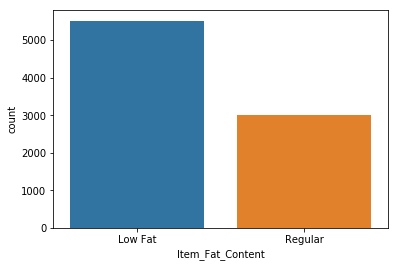

In [21]:
#Bar plot of the fat content in the food

sns.countplot(train['Item_Fat_Content'])

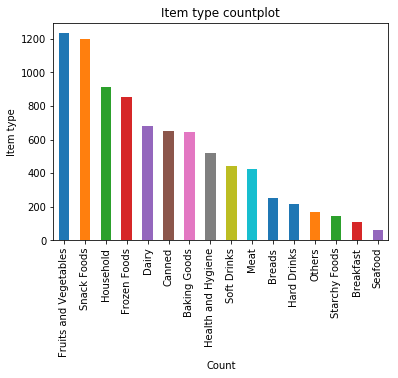

In [22]:
#Plotting count plot of item type

train['Item_Type'].value_counts().plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('Item type')
plt.title('Item type countplot')
plt.show()

### Observations:

1. The count of foods with low fats are high whereas the count of foods with regular fat content is low.

2. Fruits and Vegetable have the highest sales followed by snack foods and households and other products. Seafood has the lowest sales.

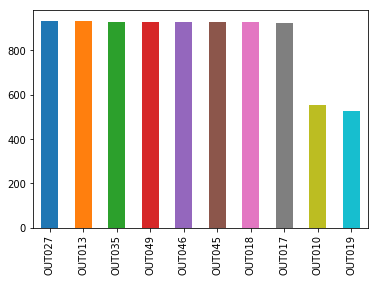

In [23]:
train['Outlet_Identifier'].value_counts().plot(kind='bar')

In [24]:
#Chekcing the types of the outlet sizes, there are 3 categories: Medium, Small and High

train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [25]:
#Outlet Size has 2410 null values

train['Outlet_Size'].isnull().sum()

2410

In [26]:
#Filling the null values of 'Outlet_size' with'Medium since medium sized stores are more.
train['Outlet_Size'].fillna(value ='Medium', inplace=True)

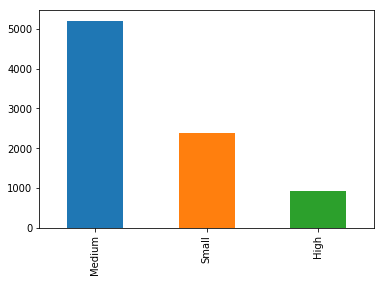

In [27]:
train['Outlet_Size'].value_counts().plot(kind='bar')
plt.show()

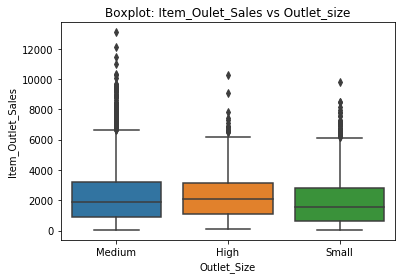

In [28]:
#outlet size vs outlet sales

sns.boxplot(train['Outlet_Size'],train['Item_Outlet_Sales'])
plt.title('Boxplot: Item_Oulet_Sales vs Outlet_size')
plt.show()

### Observations:
Medium sized outlets are the highest whereas high sized outlets are the lowest

Medium sized outlets have the highest sales followed by High sized and Small sized.

In [29]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


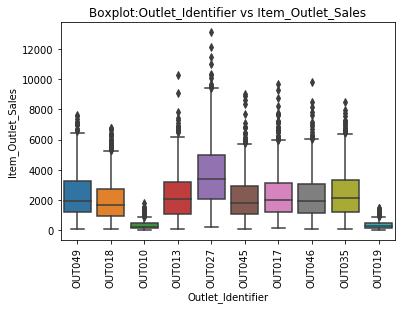

In [30]:
sns.boxplot(train['Outlet_Identifier'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)
plt.title('Boxplot:Outlet_Identifier vs Item_Outlet_Sales')
plt.show()

In [31]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


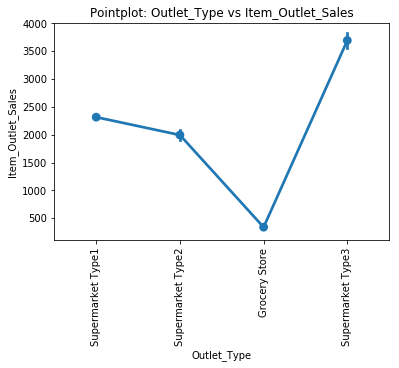

In [32]:
#Pointplot of outlet type vs item outlet sales

sns.pointplot(train['Outlet_Type'],train['Item_Outlet_Sales'])
plt.title('Pointplot: Outlet_Type vs Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()

### Observations:

1. OUT027 has the highest sales whereas OUT010 and OUT019 has the lowest sales.

2. Supermarket Type 3 has the highest sales whereas Grocery Stores have the lowest sales

In [33]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
train[train['Outlet_Identifier']=='OUT027']['Item_Type'].value_counts()

Fruits and Vegetables    140
Snack Foods              137
Household                 99
Frozen Foods              89
Canned                    72
Baking Goods              69
Dairy                     67
Health and Hygiene        60
Meat                      56
Soft Drinks               45
Breads                    31
Hard Drinks               23
Others                    15
Starchy Foods             14
Breakfast                 11
Seafood                    7
Name: Item_Type, dtype: int64

In [35]:
train[train['Outlet_Identifier']=='OUT027']['Outlet_Size'].value_counts()

Medium    935
Name: Outlet_Size, dtype: int64

In [36]:
train[train['Outlet_Identifier']=='OUT027']['Outlet_Establishment_Year'].value_counts()

1985    935
Name: Outlet_Establishment_Year, dtype: int64

In [37]:
train[train['Outlet_Identifier']=='OUT027']['Outlet_Location_Type'].value_counts()

Tier 3    935
Name: Outlet_Location_Type, dtype: int64

### Observations: OUT027

Outlet 27 has the highest sales

Outlet 27 are all 'Medium' sized outlets

All outlet 27 were established in the year 1985

All outlet 27 are located in Tier 3 cities

In [38]:
train[train['Outlet_Identifier']=='OUT010']['Item_Type'].value_counts()

Fruits and Vegetables    79
Snack Foods              71
Household                67
Frozen Foods             54
Dairy                    43
Baking Goods             42
Health and Hygiene       37
Canned                   35
Meat                     34
Soft Drinks              28
Breads                   17
Hard Drinks              16
Others                   10
Breakfast                 9
Starchy Foods             9
Seafood                   4
Name: Item_Type, dtype: int64

In [39]:
train[train['Outlet_Identifier']=='OUT010']['Outlet_Size'].value_counts()

Medium    555
Name: Outlet_Size, dtype: int64

In [40]:
train[train['Outlet_Identifier']=='OUT010']['Outlet_Establishment_Year'].value_counts()

1998    555
Name: Outlet_Establishment_Year, dtype: int64

In [41]:
train[train['Outlet_Identifier']=='OUT010']['Outlet_Location_Type'].value_counts()

Tier 3    555
Name: Outlet_Location_Type, dtype: int64

### Observations : OUT010

Outlet 10 is an under performing grocery store, with 555 'Medium' stores in total and located in Tier 3 cities.

# NULL VALUES

In [42]:
#Checking for null values if present any

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
#Checking for null in the test data if present any

test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [44]:
#Filling the missing values in the test data in outlet_size columns by mode of that column

test['Outlet_Size'].fillna('Medium',inplace=True)

In [45]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
train[train['Item_Identifier']=='FDA15']

#As all the prodcuts with same item_identifier have the same item_weight. We can print the mean value in place of null values for every item_identifier

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Medium,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Medium,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,Low Fat,0.016113,Dairy,248.8092,OUT017,2007,Medium,Tier 2,Supermarket Type1,5976.2208


In [47]:
# Filling the null values

train['Item_Weight'] = train.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [48]:
#Checking if the null values have been correctly filled


train[train['Item_Identifier']=='FDA15']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Medium,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Medium,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,9.3,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,Low Fat,0.016113,Dairy,248.8092,OUT017,2007,Medium,Tier 2,Supermarket Type1,5976.2208


In [49]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [50]:
train[pd.isnull(train['Item_Weight'])]

#Item_Weight still has null which are unique

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [51]:
#Checking the median value from item type and filling the null value in unique item_identifier

train[train['Item_Type']=='Frozen Foods']['Item_Weight'].describe()

count    855.000000
mean      12.782404
std        4.480479
min        4.555000
25%        8.905000
50%       12.850000
75%       16.700000
max       20.850000
Name: Item_Weight, dtype: float64

In [52]:
#Filling the null values

train.iloc[927,1] = 12.85

In [53]:
train[train['Item_Type']=='Snack Foods']['Item_Weight'].describe()

count    1199.000000
mean       13.031230
std         4.525416
min         5.095000
25%         9.195000
50%        13.150000
75%        16.850000
max        21.250000
Name: Item_Weight, dtype: float64

In [54]:
train.iloc[1922,1] = 13.150000

In [55]:
train[train['Item_Type']=='Dairy']['Item_Weight'].describe()

count    681.000000
mean      13.379905
std        4.699321
min        4.805000
25%        9.270000
50%       13.350000
75%       17.600000
max       20.700000
Name: Item_Weight, dtype: float64

In [56]:
train.iloc[4187,1] = 13.350000

In [57]:
train[train['Item_Type']=='Baking Goods']['Item_Weight'].describe()

count    647.000000
mean      12.285317
std        4.749789
min        4.880000
25%        8.235000
50%       11.650000
75%       15.700000
max       20.850000
Name: Item_Weight, dtype: float64

In [58]:
train.iloc[5022,1] = 11.650000

In [59]:
test.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [60]:
#Filling the null values in the test data

test['Item_Weight'] = test.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [61]:
test.isnull().sum()

Item_Identifier               0
Item_Weight                  20
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
dtype: int64

In [62]:
test[pd.isnull(test['Item_Weight'])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
884,FDI45,NaN,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3
1203,FDG50,NaN,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3
1297,FDG57,NaN,Low Fat,0.071948,Fruits and Vegetables,48.8034,OUT027,1985,Medium,Tier 3,Supermarket Type3
1300,FDJ09,NaN,Low Fat,0.058112,Snack Foods,45.5744,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,NaN,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
1741,FDI45,NaN,Low Fat,0.065800,Fruits and Vegetables,177.0054,OUT019,1985,Small,Tier 1,Grocery Store
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store


In [63]:
test['Item_Weight'] = test.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

In [64]:
train['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
5       FDP36
6       FDO10
7       FDP10
8       FDH17
9       FDU28
10      FDY07
11      FDA03
12      FDX32
13      FDS46
14      FDF32
15      FDP49
16      NCB42
17      FDP49
18      DRI11
19      FDU02
20      FDN22
21      FDW12
22      NCB30
23      FDC37
24      FDR28
25      NCD06
26      FDV10
27      DRJ59
28      FDE51
29      FDC14
        ...  
8493    FDP21
8494    NCI54
8495    FDE22
8496    FDJ57
8497    FDT08
8498    NCP54
8499    NCK53
8500    NCQ42
8501    FDW21
8502    NCH43
8503    FDQ44
8504    NCN18
8505    FDB46
8506    DRF37
8507    FDN28
8508    FDW31
8509    FDG45
8510    FDN58
8511    FDF05
8512    FDR26
8513    FDH31
8514    FDA01
8515    FDH24
8516    NCJ19
8517    FDF53
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

# Feature Engineering

In [65]:
#differentiting between Foods, Drinks, Beverages ... 

itemid = []

for i in range(0,len(train['Item_Identifier'])):
    itemid.append(train['Item_Identifier'][i][:2])

In [66]:
#Adding a column to the training data

train['Item_Category'] = itemid

In [67]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [68]:
#Adding column to the test data

itemid = []

for i in range(0,len(test['Item_Identifier'])):
    itemid.append(test['Item_Identifier'][i][:2])

In [69]:
test['Item_Category'] = itemid

In [70]:
train[train['Item_Weight']==0].shape

(0, 13)

In [71]:
train['Item_Weight'].describe()

count    8523.000000
mean       12.875361
std         4.645031
min         4.555000
25%         8.785000
50%        12.650000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [72]:
train['Item_Weight'].replace(to_replace = 0, value = 12.650000, inplace = True)

In [73]:
#Creating a new column price_per_unit

train['Price_Per_Unit'] = train['Item_MRP']/train['Item_Weight']

In [74]:
test['Price_Per_Unit'] = test['Item_MRP']/test['Item_Weight']

In [75]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,6.031512


In [76]:
#Since the data is of 2013, determining the existence year

train['Existence'] = 2013 - train['Outlet_Establishment_Year']

In [77]:
test['Existence'] = 2013 - test['Outlet_Establishment_Year']

In [78]:
train[train['Item_Visibility']==0].shape

(526, 15)

In [79]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [80]:
#Replaceing the visibility value of 0 with its median value in training data

train['Item_Visibility'].replace(to_replace = 0, value =0.053931, inplace =True )

In [81]:
test['Item_Visibility'].describe()

count    5681.000000
mean        0.065684
std         0.051252
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [82]:
#Replaceing the visibility value of 0 with its median value in testing data

test['Item_Visibility'].replace(to_replace = 0, value =0.054154, inplace =True )

In [83]:
train.shape

(8523, 15)

In [84]:
test.shape

(5681, 14)

In [85]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [86]:
#Creating a list of Perishable item

perishables = ['Dairy','Meat','Fruits and Vegetables','Breakfast','Breads','Seafood']

In [87]:
#seperating the perishable item_type from the non perishable ones

train['Item_Type_Category'] = np.where(train['Item_Type'].isin(perishables),'Perishables','Non-Perishables')
test['Item_Type_Category'] = np.where(test['Item_Type'].isin(perishables),'Perishables','Non-Perishables')

In [88]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Price_Per_Unit,Existence,Item_Type_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,26.861204,14,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,8.153581,4,Non-Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,8.092457,14,Perishables
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,9.484115,15,Perishables
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,6.031512,26,Non-Perishables


In [89]:
#Dropping the extra columns

newtrain = train.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Type','Outlet_Identifier'],axis=1)
newtest = test.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Type','Outlet_Identifier'],axis=1)

In [90]:
newtrain.shape

(8523, 12)

In [91]:
#Creating dummies on test and train data

train_dummy = pd.get_dummies(newtrain)
test_dummy = pd.get_dummies(newtest)

In [92]:
#Standardising the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_train = pd.DataFrame(sc.fit_transform(train_dummy), columns = train_dummy.columns)
scaled_test  =pd.DataFrame(sc.fit_transform(test_dummy),columns=test_dummy.columns)

In [93]:
scaled_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Price_Per_Unit,Existence,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_Type_Category_Non-Perishables,Item_Type_Category_Perishables
0,-0.769763,-1.092518,1.747454,0.910601,1.762166,-0.139541,0.738147,-0.738147,-0.350395,0.798807,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.443459,1.443459
1,-1.497465,-1.026432,-1.489023,-1.018440,-0.568853,-1.334103,-1.354743,1.354743,-0.350395,0.798807,...,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558,0.692780,-0.692780
2,0.995668,-1.077939,0.010040,-0.049238,-0.576470,-0.139541,0.738147,-0.738147,-0.350395,0.798807,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.443459,1.443459
3,1.361672,-0.317640,0.660050,-0.849103,-0.403065,-0.020085,-1.354743,1.354743,-0.350395,0.798807,...,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.443459,1.443459
4,-0.849422,-0.317640,-1.399220,-0.695373,-0.833269,1.293934,0.738147,-0.738147,2.853918,-1.251866,...,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915,0.692780,-0.692780


# Building a Model

In [94]:
#importin random forest regressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [95]:
x = scaled_train.drop('Item_Outlet_Sales',axis=1)
y = scaled_train['Item_Outlet_Sales']

model1 = rf.fit(x,y)

In [96]:
pred = model1.predict(scaled_test)

In [97]:
#Inverse Scaling

sm = StandardScaler()
sales = sm.fit_transform(pd.DataFrame(train_dummy['Item_Outlet_Sales']))
org_sales = sm.inverse_transform(pred)

In [98]:
solution = pd.DataFrame({"Item_Identifier":test['Item_Identifier'],"Outlet_Identifier":test['Outlet_Identifier'],"Item_Outlet_Sales":org_sales})

In [99]:
solution.to_csv('Big Sales mart.csv',index =False)

# OBSERVATION

RMSE score of 1251 with Random Forest Regressor